# Comparative Analysis of SVM Performance on Colored vs. Grayscale CIFAR-10 Datasets
<div style="text-align: right">Uday Kiran Dasari <br> </div>

## Objective

The primary objective of this project is to evaluate the performance of Support Vector Machine (SVM) classifiers on the CIFAR-10 dataset by comparing the effectiveness of models trained on colored images versus those trained on grayscale images. The goal is to determine which version of the dataset yields better classification results and to analyze the underlying reasons for any observed differences in performance.

**Steps Involved:**

**1. Data Preparation:**
- Load the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes.
- Split the dataset into training and testing sets for both colored and grayscale images.


**2.Model Training and Hyperparameter Tuning:**
- Use GridSearchCV to find the optimal hyperparameters for the SVM model. The parameters grid includes values for C and gamma.
- Train the SVM model on the colored CIFAR-10 dataset using the best parameters identified.
- Repeat the training process for the grayscale version of the CIFAR-10 dataset.


**3.Evaluation and Comparison:**
- Evaluate the trained SVM models on the respective test sets.
- Generate classification reports to assess the precision, recall, F1-score, and overall accuracy for both colored and grayscale datasets.
- Compare the performance metrics between the two versions of the dataset.


**4.Theoretical Considerations:**
- Discuss the potential impact of converting colored images to grayscale on the model's ability to differentiate between classes.
- Analyze the importance of color information in object recognition tasks.

## Dataset Preparation
### Function to read the CIFAR batches

In [1]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [2]:
import pickle
import numpy as np
import os
#from scipy.misc import imread
from matplotlib.pyplot import imread

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    datadict = unpickle(filename)
    X = datadict['data']
    Y = datadict['labels']
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y = np.array(Y)
    return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

#### Read all the individual batches as datasets

In [4]:
cifar10_dir = 'cifar-10-batches-py'  # Assuming the dataset is in this directory

for batch_num in range(1, 6):  # Iterate through batches 1 to 10
    batch_file = f"{cifar10_dir}/data_batch_{batch_num}"  # Construct the batch file path
    batch_data = unpickle(batch_file)  # Use your unpickle function
    batch_name = f"db{batch_num}"  # Create a variable name for the batch
    globals()[batch_name] = batch_data  # Assign the unpickled data to a global variable

# Print the keys of the unpickled batch data (example for batch 1):
print(db1.keys())

dict_keys(['batch_label', 'labels', 'data', 'filenames'])


In [5]:
dba = [db1,db2,db3,db4,db5]
from collections import Counter
for db in dba:
    print(set(db['labels']))
    print(Counter(db['labels']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Counter({2: 1032, 6: 1030, 8: 1025, 3: 1016, 0: 1005, 7: 1001, 4: 999, 9: 981, 1: 974, 5: 937})
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Counter({7: 1026, 4: 1010, 2: 1010, 6: 1008, 1: 1007, 3: 995, 5: 988, 8: 987, 9: 985, 0: 984})
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Counter({1: 1042, 5: 1029, 9: 1029, 7: 1015, 3: 997, 0: 994, 4: 990, 6: 978, 2: 965, 8: 961})
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Counter({2: 1041, 8: 1024, 5: 1021, 6: 1004, 4: 1004, 0: 1003, 9: 983, 7: 981, 3: 976, 1: 963})
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Counter({5: 1025, 9: 1022, 3: 1016, 1: 1014, 0: 1014, 8: 1003, 4: 997, 6: 980, 7: 977, 2: 952})


#### Necessary imports for modelling

In [6]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## Model Training and Hyperparameter Tuning
- Use GridSearchCV to find the optimal hyperparameters for the SVM model. The parameters grid includes values for C and gamma.
- Train the SVM model on the colored CIFAR-10 dataset using the best parameters identified.
- Repeat the training process for the grayscale version of the CIFAR-10 dataset.

#### Defining the SVM Model

In [7]:
#Defining the model
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [8]:
db2['data'].shape

(10000, 3072)

### Individual CIFAR Color batches

Display the Coloured Image

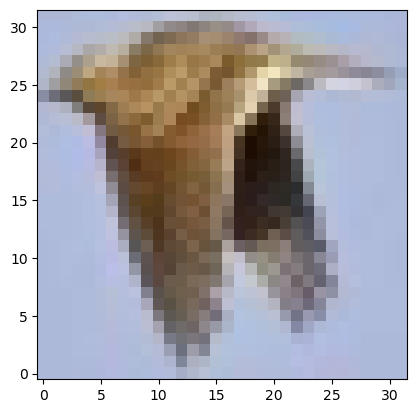

In [9]:
IMG1 = db1['data'][123].reshape(3, 32, 32).transpose(1,2,0).astype("float")
IMG1b = np.flip(IMG1, (0,1))

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(IMG1b.astype('uint8'), origin='lower')

#### Flattening and Splitting of Datasets and GridSearch CV

In [10]:
# Parameters for grid search
param_grid = {'svc__C': [1, 5], 'svc__gamma': [0.001, 0.005]}

# List of datasets
dbs = [db1, db2, db3, db4, db5]

# Iterate over each dataset
for i, db in enumerate(dbs, start=1):
    # Flatten the image data
    X_flattened = np.array([img.flatten() for img in db['data']])

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_flattened, db['labels'], test_size=0.2, random_state=42)

    print(f"Starting grid search on db{i}...")
    start_time = time.time()
    grid = GridSearchCV(model, param_grid)
    grid.fit(X_train, y_train)
    end_time = time.time()

    # Get the best estimator
    best_model = grid.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Classification report
    print(f"Classification report for db{i} on the test set:")
    print(classification_report(y_test, y_pred))

    print(f"Best parameters for db{i}: {grid.best_params_}")
    print(f"Time taken for db{i}: {end_time - start_time} seconds\n")

Starting grid search on db1...
Classification report for db1 on the test set:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       207
           1       0.55      0.63      0.59       213
           2       0.38      0.38      0.38       197
           3       0.40      0.37      0.38       199
           4       0.42      0.41      0.41       205
           5       0.38      0.36      0.37       177
           6       0.51      0.47      0.49       187
           7       0.53      0.52      0.52       200
           8       0.63      0.61      0.62       224
           9       0.48      0.54      0.51       191

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.48      0.48      0.48      2000

Best parameters for db1: {'svc__C': 5, 'svc__gamma': 0.005}
Time taken for db1: 170.84272074699402 seconds

Starting grid search on db2...
Classification report fo

#### Observations
**Best SVC Parameters for all the 5 CIFAR Colour batches are as follows:**

- 'svc__C': 5

- 'svc__gamma': 0.005

**F1 score Accuracy for each batch:**

- Batch1: 0.48

- Batch2: 0.45

- Batch3: 0.45

- Batch4: 0.45

- Batch5: 0.46

**Out of five batches, Batch 1 has the best f1 score accuracy.**

### Whole CIFAR Color batch

#### Loading the whole CIFAR Colour dataset

In [12]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cifar-10-batches-py'
AX_train,ay_train,AX_test,ay_test = load_CIFAR10(cifar10_dir)

In [13]:
print ('Training data shape: ', AX_train.shape)
print ('Training labels shape: ', ay_train.shape)
print ('Test data shape: ', AX_test.shape)
print ('Test labels shape: ', ay_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


#### Flattening the Training and Testing Dataset

In [14]:
#Flattening the Training set
AX_train_flattened = np.zeros((50000, 3072))
for i in range(50000):
    AX_train_flattened[i] = AX_train[i].flatten()

AX_train_flattened.shape

(50000, 3072)

In [15]:
#Flattening the Testing set
AX_test_flattened = np.zeros((10000, 3072))
for i in range(10000):
    AX_test_flattened[i] = AX_test[i].flatten()

AX_test_flattened.shape

(10000, 3072)

#### GridsearchCV for the whole CIFAR Colour Dataset

In [16]:
# Parameters for grid search
param_grid = {'svc__C': [1, 5], 'svc__gamma': [0.001, 0.005]}

print(f"Starting grid search on db...")
start_time = time.time()
grid = GridSearchCV(model, param_grid)
grid.fit(AX_train_flattened[:15000], ay_train[:15000])
end_time = time.time()

# Get the best estimator
best_model = grid.best_estimator_

# Make predictions on the test set
ay_pred = best_model.predict(AX_test_flattened)

# Classification report
print(f"Classification report for db{i} on the test set:")
print(classification_report(ay_test, ay_pred))

print(f"Best parameters for db{i}: {grid.best_params_}")
print(f"Time taken for db{i}: {end_time - start_time} seconds\n")

Starting grid search on db...
Classification report for db9999 on the test set:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      1000
           1       0.56      0.64      0.60      1000
           2       0.38      0.39      0.39      1000
           3       0.36      0.35      0.36      1000
           4       0.44      0.46      0.45      1000
           5       0.43      0.38      0.41      1000
           6       0.57      0.57      0.57      1000
           7       0.60      0.53      0.56      1000
           8       0.64      0.63      0.63      1000
           9       0.51      0.54      0.53      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000

Best parameters for db9999: {'svc__C': 5, 'svc__gamma': 0.005}
Time taken for db9999: 597.4102010726929 seconds



#### Observations
**Best SVC Parameters are as follows:**

- **'svc__C': 5**

- **'svc__gamma': 0.005**

**F1 score Accuracy: 51%**

### Individual B&W CIFAR batches

#### Helper functions
1. To load the batch files
2. To convert colored images to grayscale
3. Process the grayscale images and flatten the shape

In [17]:
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    datadict = unpickle(filename)
    X = datadict['data']
    Y = datadict['labels']
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y = np.array(Y)
    return X, Y

def rgb2gray(rgb):
    r, g, b = rgb[0], rgb[1], rgb[2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def process_batch(filename):
    # Load the batch
    GX, GY = load_CIFAR_batch(filename)

    # Convert to grayscale
    GX_gray = GX.copy()
    for i in range(GX_gray.shape[0]):
        for j in range(GX_gray.shape[1]):
            for k in range(GX_gray.shape[2]):
                rgb = GX_gray[i, j, k]
                gray = rgb2gray(rgb)
                GX_gray[i, j, k] = gray

    # Flatten the grayscale images
    GX_gray_flattened = np.zeros((GX_gray.shape[0], 3072))
    for i in range(GX_gray.shape[0]):
        GX_gray_flattened[i] = GX_gray[i].flatten()

    return GX_gray_flattened, GY

#### GridSearchCV for 5 B&W Batches

In [19]:
# Parameters for grid search
param_grid = {'svc__C': [1, 5], 'svc__gamma': [0.001, 0.005]}


# Iterate over each of the 5 batches
for i in range(1, 6):
    filename = f"cifar-10-batches-py/data_batch_{i}"
    GX_gray_flattened, gy = process_batch(filename)
    # Split into training and testing sets
    GX_train, GX_test, gy_train, gy_test = train_test_split(GX_gray_flattened, gy, test_size=0.2, random_state=42)
    print(f"Starting grid search on batch {i}...")
    start_time = time.time()
    grid = GridSearchCV(model, param_grid)
    grid.fit(GX_train, gy_train)
    end_time = time.time()

    # Get the best estimator
    best_model = grid.best_estimator_

    # Make predictions on the test set
    gy_pred = best_model.predict(GX_test)

    # Classification report
    print(f"Classification report for batch {i} on the test set:")
    print(classification_report(gy_test, gy_pred))

    print(f"Best parameters for db{i}: {grid.best_params_}")
    print(f"Time taken for db{i}: {end_time - start_time} seconds\n")

Starting grid search on batch 1...
Classification report for batch 1 on the test set:
              precision    recall  f1-score   support

           0       0.43      0.36      0.39       207
           1       0.45      0.51      0.47       213
           2       0.27      0.29      0.28       197
           3       0.32      0.25      0.28       199
           4       0.30      0.37      0.33       205
           5       0.34      0.30      0.32       177
           6       0.36      0.39      0.37       187
           7       0.45      0.38      0.41       200
           8       0.53      0.50      0.52       224
           9       0.43      0.51      0.46       191

    accuracy                           0.39      2000
   macro avg       0.39      0.38      0.38      2000
weighted avg       0.39      0.39      0.39      2000

Best parameters for db1: {'svc__C': 5, 'svc__gamma': 0.005}
Time taken for db1: 187.02176904678345 seconds

Starting grid search on batch 2...
Classificati

#### Observations
**Best Parameters for all the 5 Black and white batches are as follows:**

- 'svc__C': 5

- 'svc__gamma': 0.005

**F1 score Accuracy**


- Batch1: 0.39

- Batch2: 0.37

- Batch3: 0.38

- Batch4: 0.37

- Batch5: 0.36


**Out of five batches, Batch number 1 has best f1 score accuracy.**

### Whole B&W CIFAR batch

#### Convert the test and train data to grayscale and flattening the dataset

In [20]:
AX_train_gray = AX_train.copy()
AX_test_gray = AX_test.copy()

In [21]:
#For training Dataset
for i in range(AX_train_gray.shape[0]):
        for j in range(AX_train_gray.shape[1]):
            for k in range(AX_train_gray.shape[2]):
                rgb = AX_train_gray[i, j, k]
                gray = rgb2gray(rgb)
                AX_train_gray[i, j, k] = gray
# Flatten the grayscale images
AX_train_gray_flattened = np.zeros((AX_train_gray.shape[0], 3072))
for i in range(AX_train_gray.shape[0]):
    AX_train_gray_flattened[i] = AX_train_gray[i].flatten()

In [22]:
#For testing Dataset
for i in range(AX_test_gray.shape[0]):
        for j in range(AX_test_gray.shape[1]):
            for k in range(AX_test_gray.shape[2]):
                rgb = AX_test_gray[i, j, k]
                gray = rgb2gray(rgb)
                AX_test_gray[i, j, k] = gray
# Flatten the grayscale images
AX_test_gray_flattened = np.zeros((AX_test_gray.shape[0], 3072))
for i in range(AX_test_gray.shape[0]):
    AX_test_gray_flattened[i] = AX_test_gray[i].flatten()

Display the GrayScale Image

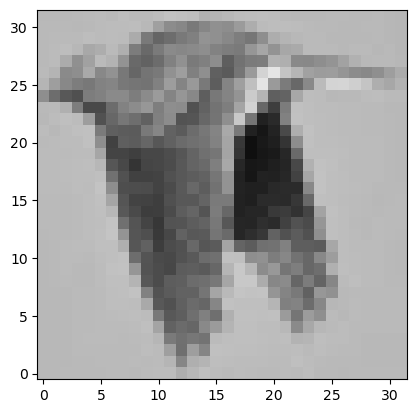

In [23]:
plt.imshow(np.flip(AX_train_gray[123], (0,1)).astype('uint8'), origin='lower')

#### GridSearchCV for whole CIFAR B&W Dataset

In [24]:
# Parameters for grid search
param_grid = {'svc__C': [1, 5], 'svc__gamma': [0.001, 0.005]}

print(f"Starting grid search on db...")
start_time = time.time()
grid = GridSearchCV(model, param_grid)
grid.fit(AX_train_gray_flattened[:15000], ay_train[:15000])
end_time = time.time()

# Get the best estimator
best_model = grid.best_estimator_

# Make predictions on the test set
ay_pred = best_model.predict(AX_test_gray_flattened)

# Classification report
print(f"Classification report for db{i} on the test set:")
print(classification_report(ay_test, ay_pred))

print(f"Best parameters for db{i}: {grid.best_params_}")
print(f"Time taken for db{i}: {end_time - start_time} seconds\n")

Starting grid search on db...
Classification report for db9999 on the test set:
              precision    recall  f1-score   support

           0       0.47      0.41      0.44      1000
           1       0.48      0.55      0.51      1000
           2       0.30      0.34      0.32      1000
           3       0.29      0.23      0.26      1000
           4       0.34      0.40      0.37      1000
           5       0.42      0.36      0.39      1000
           6       0.47      0.44      0.45      1000
           7       0.51      0.49      0.50      1000
           8       0.52      0.55      0.53      1000
           9       0.46      0.49      0.47      1000

    accuracy                           0.43     10000
   macro avg       0.43      0.43      0.43     10000
weighted avg       0.43      0.43      0.43     10000

Best parameters for db9999: {'svc__C': 5, 'svc__gamma': 0.005}
Time taken for db9999: 668.8193366527557 seconds



#### Observations
**Best SVC Parameters are as follows:**

- 'svc__C': 5

- 'svc__gamma': 0.005

**F1 score Accuracy: 43%**

## Comparative Analysis: Color CIFAR vs. Grayscale CIFAR
1. **Overall F1 Score:**
Colored CIFAR: 51%
Grayscale CIFAR: 43%
The SVM model performs better on the colored dataset.


2. **Class-wise F1 Score:**
The F1 scores for individual classes are higher in the colored dataset compared to the grayscale dataset, indicating that color information aids in better class differentiation.


3. **Precision and Recall:**
Higher precision and recall in the colored dataset demonstrate improved performance in identifying relevant instances with fewer false positives and negatives.


**Theoretical Considerations:**


1. **Information Loss in Grayscale Conversion:**
    Converting images to grayscale results in the loss of color information, which is crucial for distinguishing between certain objects.


2. **Texture and Shape Recognition:**
    While grayscale images can suffice for tasks relying on texture and shape, the diverse objects in CIFAR-10 (e.g., vehicles and animals) benefit significantly from color information.


3. **Hyperparameters:**
    The optimal parameters (svc__C: 5, svc__gamma: 0.005) were consistent across both datasets, indicating stable model tuning. Expanding the parameter grid could potentially enhance the model further.

## Conclusion
The analysis demonstrates that the SVM classifier achieves higher F1 scores when trained on the colored CIFAR-10 dataset compared to the grayscale version. This underscores the importance of color information in image classification tasks, enhancing the model's ability to distinguish between different objects. The reduction in classification performance with grayscale images highlights the loss of crucial features that color provides. This comparative study emphasizes the value of preserving color information for effective image classification using SVMs.